#### Lab-6 SVM:
In this laboratory session, we will explore the practical implementation of Support Vector Machines (SVM) for classification tasks. Through various examples, we will demonstrate how SVM can be used to effectively classify data points based on specific features or characteristics. By the end of this session, you will gain valuable insights into the real-world applications of SVM and its potential benefits for solving classification problems.
## Lab-6 Objectives
1. SVM basics
2. Softmargin SVM.
3. Kernel SVM

## Recap

1. What is SVM? Is it used for classification or regression?

2. What are Support Vectors?

3. What is a Hyperplane?

4. What is a Margin?

5. How does SVM work?


#### Import libraries

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


* We will first consider the simple case of a classification task, in which the two classes of points are **well** separated into two classes:

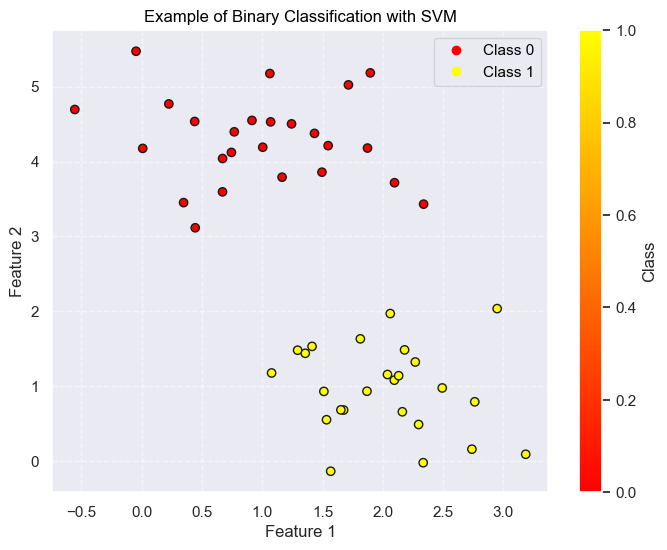

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Define figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Example of Binary Classification with SVM')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Class')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Class 0', 'Class 1'], loc='upper right')

# Add annotations
ax.annotate('Class 0', xy=(-1.5, 2), xytext=(-3, 3),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Class 1', xy=(2.5, -1), xytext=(3, -2),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


* We will draw three lines that can separate these two classe. Depending on which line you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to consider the **margin**.

* We will draw around each line a margin of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

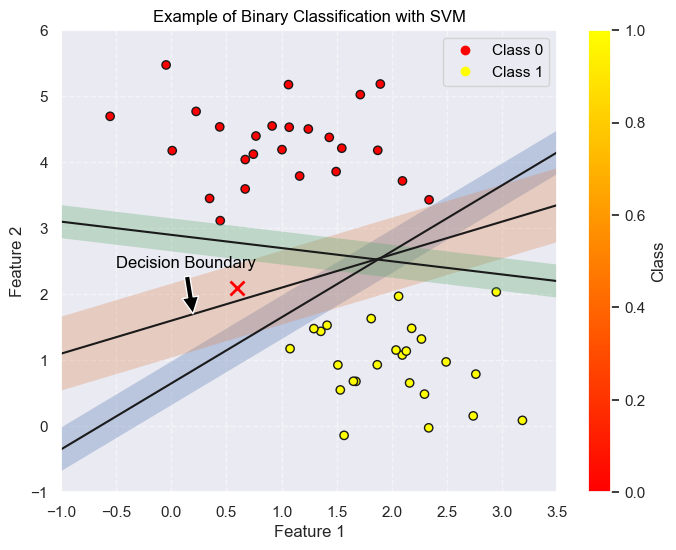

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Define figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Example of Binary Classification with SVM')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Class')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Class 0', 'Class 1'], loc='upper right')

# Add decision boundaries
xfit = np.linspace(-1, 3.5)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.56), (-0.2, 2.9, 0.25)]: #the slope, intercept, and margin values
    yfit = m * xfit + b
    ax.plot(xfit, yfit, '-k')
    ax.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', alpha=0.3)

# Add annotations
ax.annotate('Decision Boundary', xy=(0.2, 1.67), xytext=(-0.5, 2.4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
plt.xlim(-1, 3.5)
plt.ylim(-1, 6)
plt.show()


* We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

### Support vector classifier

**Task#1**

Fit a simple SVC for classifing the previous data

In [54]:
# Write your code here
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X, y)

SVC(kernel='linear')

#### Plot the SVC decision function

The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  .𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗()  method of the SVC

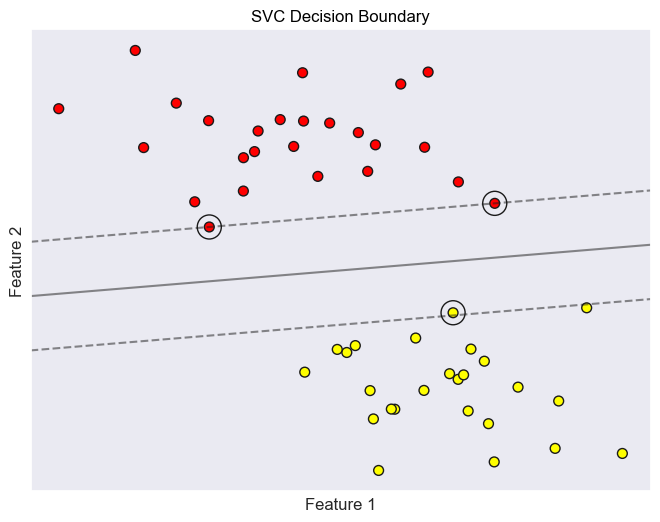

In [55]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # highlight the support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k')
plot_svc_decision_function(model, ax)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Decision Boundary')
plt.show()


* SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [56]:
# get support vectors
print("Support vectors: \n", model.support_vectors_,"\n")

# get indices of support vectors
print("Indices of the support vectors: \n", model.support_,"\n")

# get number of support vectors for each class
print("Number of the support vectors: \n", model.n_support_)


Support vectors: 
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]] 

Indices of the support vectors: 
 [18 25  7] 

Number of the support vectors: 
 [2 1]


* Let's see how the number of samples affect the svm model and it's margin

In [57]:
def plot_svm(N=10, ax=None, C=1E10):
    #Make blobs
    X, y = make_blobs(n_samples=300, centers=2,
                      random_state=0, cluster_std=0.90)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    #ax = ax or plt.gca()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='k')
    
    # Add labels and title and clear out annotations
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary with Margins')
    #ann.remove()

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Class')

    # Add legend
    handles, labels = scatter.legend_elements()
    ax.legend(handles, ['Class 0', 'Class 1'], loc='upper right')

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    
    # Add/remove annotations
    ann = ax.annotate('Margin', xy=(model.support_vectors_[0] + [0.5, -1]), xytext=(2.5, 4), color='k', arrowprops=dict(facecolor='black', shrink=0.05))
    ann.remove()
     
    plot_svc_decision_function(model, ax)
    plt.show()

In [58]:
!pip3 install ipywidgets

In [59]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Make an interactive plot
from ipywidgets import interact, fixed
interact(plot_svm, N=[20, 100, 200, 300], C = [1E10, 1E5, 2, 4, 5], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(20, 100, 200, 300), value=20), Dropdown(description='…

The  𝚌  argument allows us to specify the cost of a violation to the margin. When the  𝚌  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  𝚌  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best 𝚌  argument? n

We will see how to use SVM for classifing images of hand-written digits.

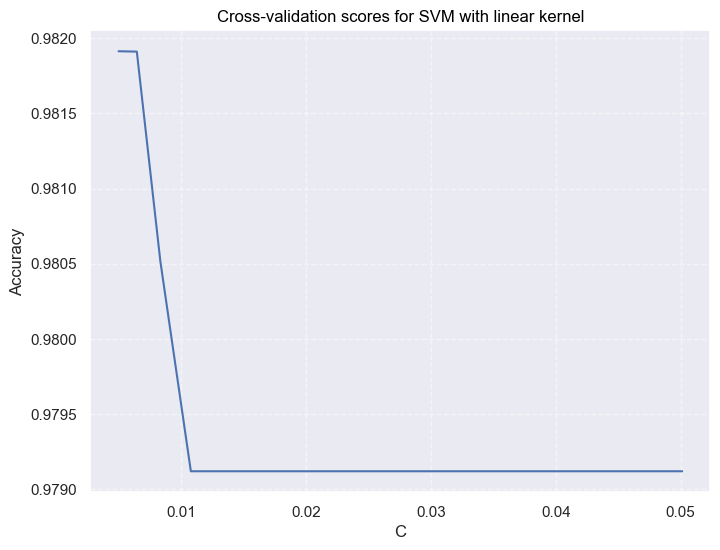

Maximum cross-validation score: 0.982
Corresponding C value: 0.005


In [60]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)

Cs = np.logspace(-2.3, -1.3, 10)
cv_scores = []

# Use cross_val_score for finding the best C from Cs
for c in Cs:
    model = SVC(kernel="linear", C=c)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(score))

# plot the cross-validation scores vs C
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Cs, cv_scores)
ax.set_xscale('linear')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation scores for SVM with linear kernel')
ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

# print the maximum cross-validation score and the corresponding C value
print(f"Maximum cross-validation score: {np.max(cv_scores):.3f}")
print(f"Corresponding C value: {Cs[np.argmax(cv_scores)]:.3f}")

* Print classification_report, confusion_matrix for the a model with the best c argument

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        42
           5       1.00      0.92      0.96        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.93      1.00      0.97        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:



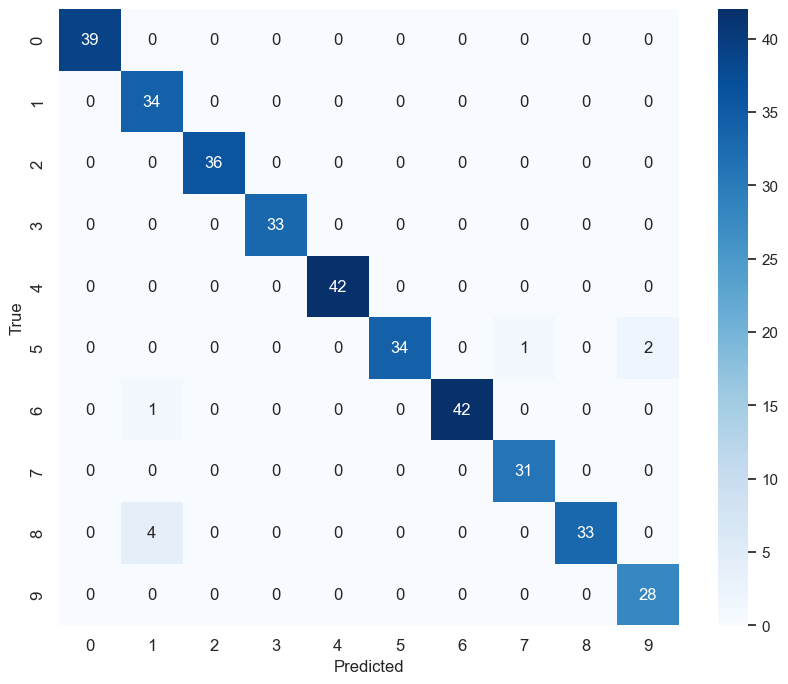

In [61]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Train SVM with a linear kernel
svc = SVC(kernel="linear", C = Cs[np.argmax(cv_scores)])
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1, rc={"text.color": "black"})
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 12})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Kernel SVM

1. What is called a kernel trick?

### Most popular kernel types

![image.png](image.png)



### Generating data

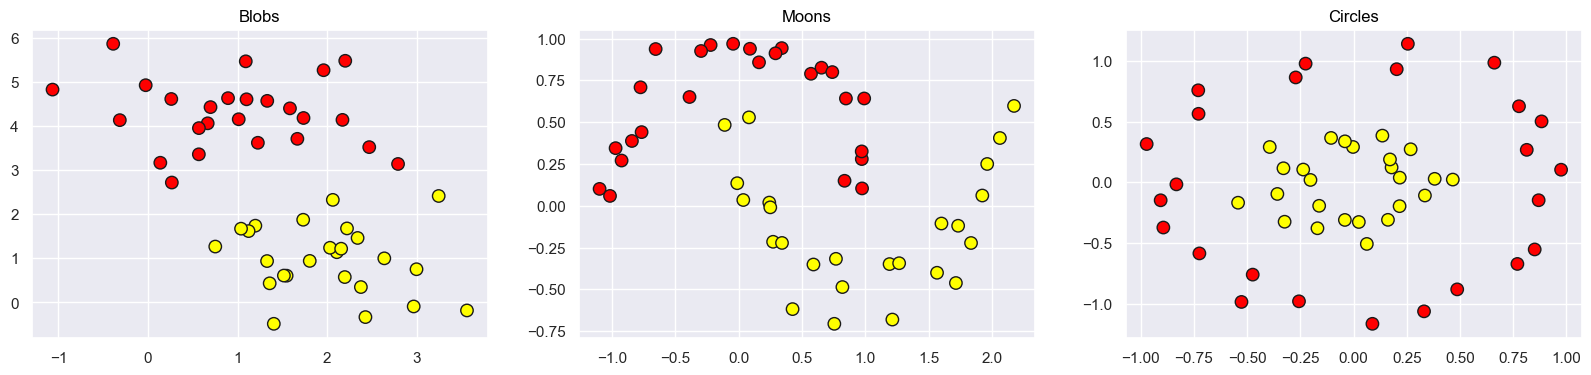

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot(1, 3, 1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=80, cmap='autumn',edgecolor='k')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot(1, 3, 2)
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=80, cmap='autumn', edgecolor='k')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot(1, 3, 3)
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=80, cmap='autumn', edgecolor='k')
plt.show()


In [63]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=400, linewidth=1, facecolors='none', edgecolors='k')

    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
        

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [64]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(24, 5))

    linear_model = SVC(kernel="linear")
    linear_model.fit(X,Y)
    plt.subplot(1,3,1)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm')
    plt.title("Linear Kernel")
    plot_svc_decision_function(linear_model)

    gaussian_model = SVC(kernel="rbf")
    gaussian_model.fit(X,Y)
    plt.subplot(1,3,2)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm')
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

    poly_model = SVC(kernel="poly")
    poly_model.fit(X,Y)
    plt.subplot(1,3,3)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm')
    plt.title("Polynomial Kernel")
    plot_svc_decision_function(poly_model)

    plt.show()


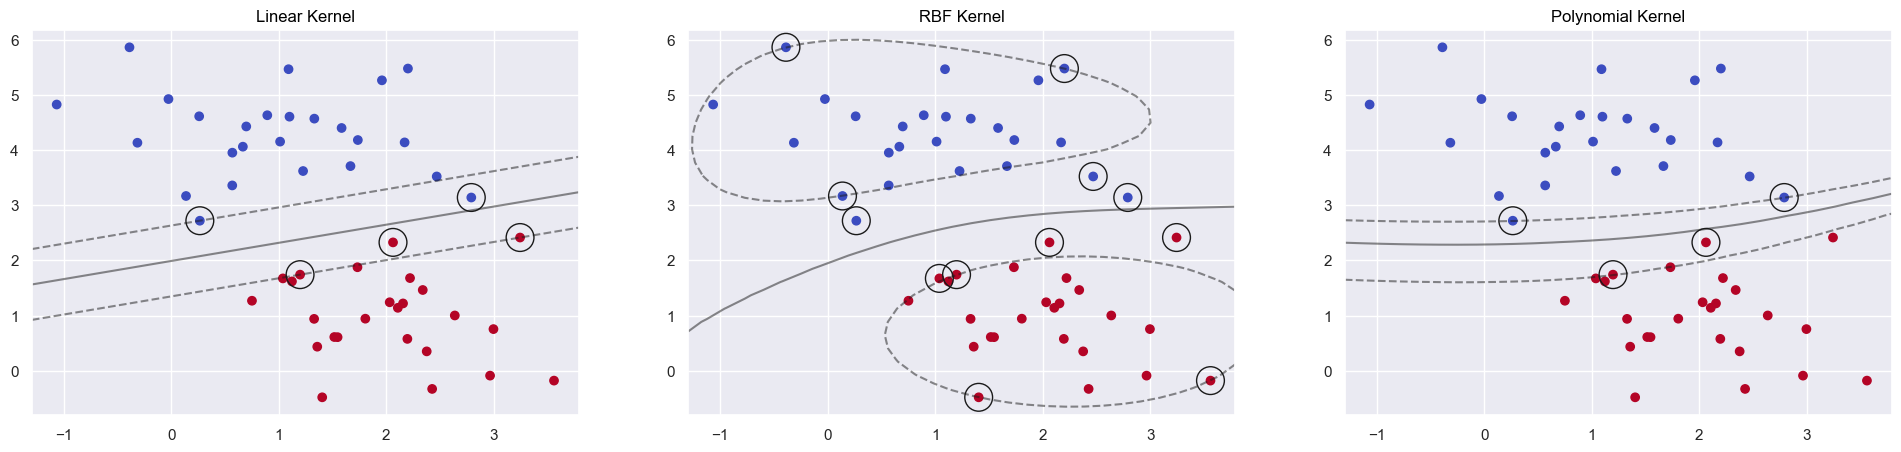

In [65]:
# test kernels for each dataset
# this is the approximate output you should get for the blobs dataset
test_kernels(X_blob, Y_blob)

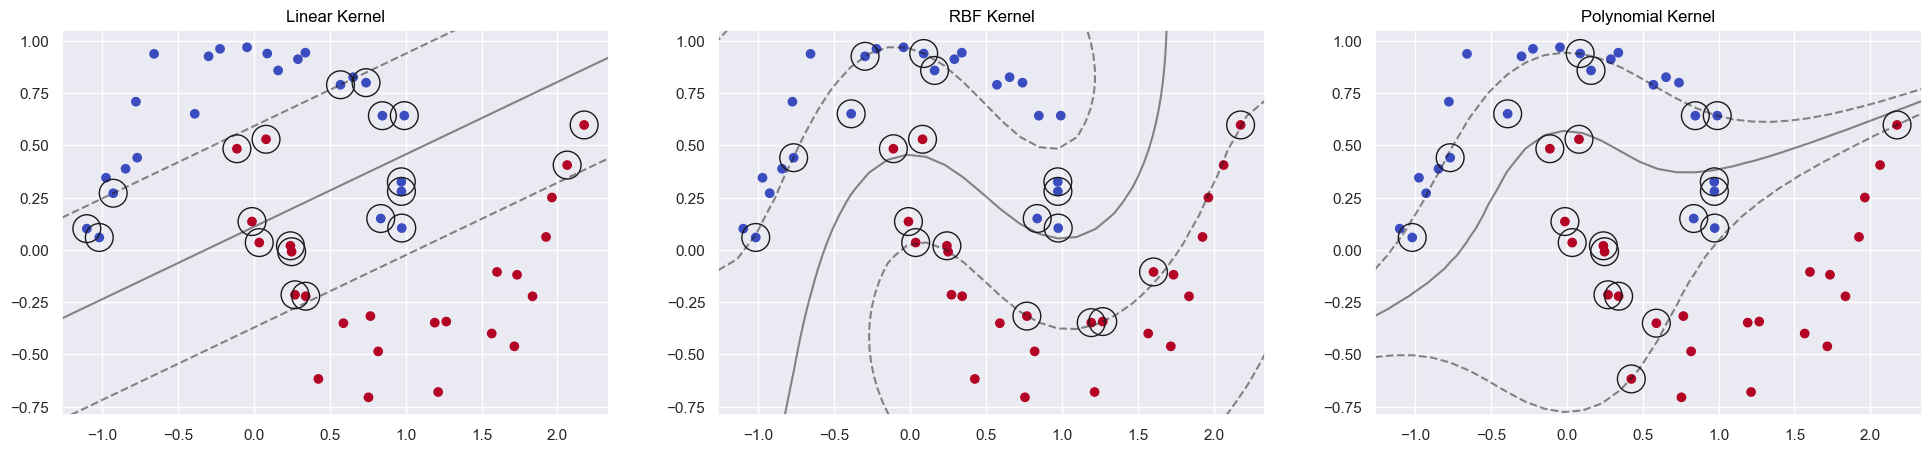

In [66]:
test_kernels(X_moon, Y_moon)

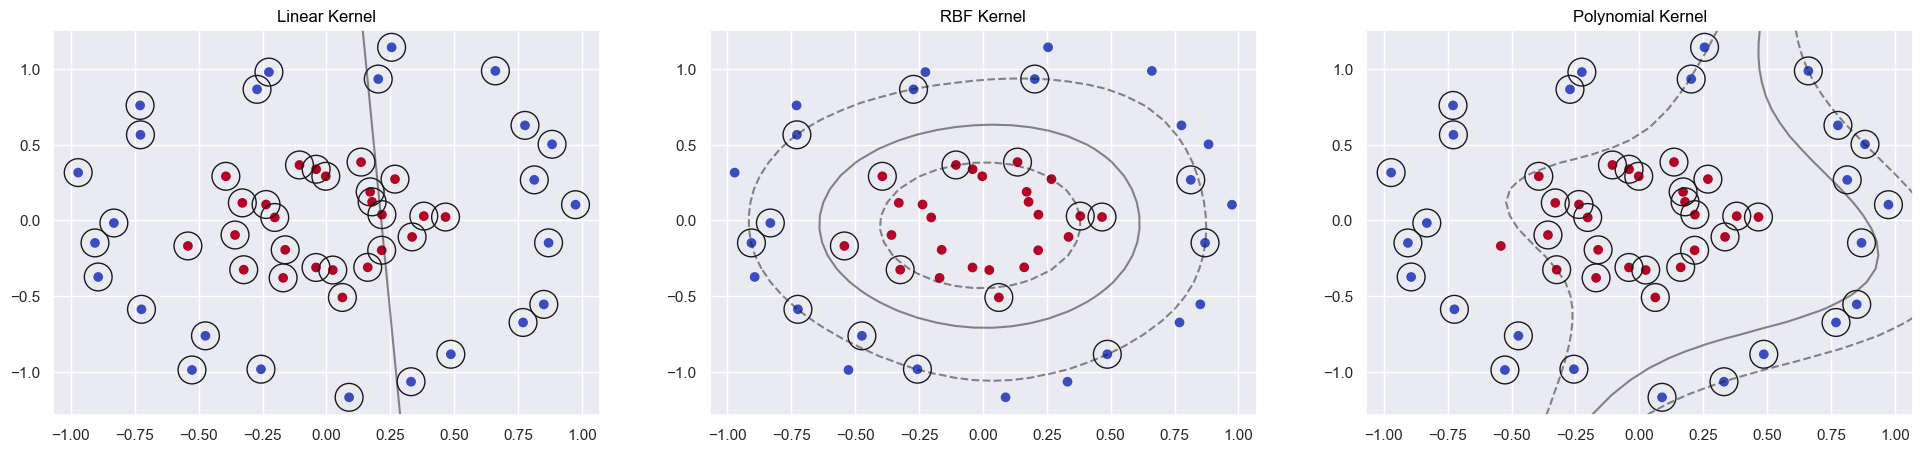

In [67]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.



![alt text](https://dinhanhthi.com/img/post/ML/support-vector-machine/svm-5.jpg)

In [68]:
# Manually tune parameters for the moons dataset, plotting the result
def test_gamma(gamma=1):
    gaussian_model = SVC(kernel="rbf", gamma=gamma)
    gaussian_model.fit(X_moon,Y_moon) 
    plt.figure(figsize=(8,6))
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, cmap='coolwarm')
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)
    #plt.xlim(X_moon[:, 0].min()-0.2, X_moon[:, 0].max()+0.2)
    #plt.ylim(X_moon[:, 1].min()-0.2, X_moon[:, 1].max()+0.2)

def test_degree(degree=1):
    gaussian_model = SVC(kernel="poly", degree=degree)
    gaussian_model.fit(X_moon,Y_moon) 
    plt.figure(figsize=(8,6))
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, cmap='coolwarm')
    plt.title("Poly Kernel")
    plot_svc_decision_function(gaussian_model)
    #plt.xlim(X_moon[:, 0].min()-0.2, X_moon[:, 0].max()+0.2)
    #plt.ylim(X_moon[:, 1].min()-0.2, X_moon[:, 1].max()+0.2)


In [69]:
interact(test_gamma, gamma=[0, 1, 2, 3, 1E3])

interactive(children=(Dropdown(description='gamma', index=1, options=(0, 1, 2, 3, 1000.0), value=1), Output())…

<function __main__.test_gamma(gamma=1)>

In [70]:
interact(test_degree, degree=[1, 2, 5, 3,11, 10, 14])

interactive(children=(Dropdown(description='degree', options=(1, 2, 5, 3, 11, 10, 14), value=1), Output()), _d…

<function __main__.test_degree(degree=1)>